#### Important notes before you get started

1. This notebook uses SAS Software and R. R is free, SAS is not. You must have a SAS license to run SAS or use SAS onDemand for Academics (free). In addition, you need to install the SAS kernal for jupyter notebook, available here: https://github.com/sassoftware/sas_kernel

2. All file paths in this notebook will need to be revised to the destination you choose to place this notebook and all the datafiles.

3. For those who don't want to install SAS but still want to have a look at the code and its output, we provide a PDF version of the notebook, including all the input and output data files from this analysis.

#### Dependencies: file locations and libraries

In [13]:
%let location =F:\Manuscripts\2021_06_02_Nature_Comm_DSense\GITHUB\data;
libname repo 'F:\Manuscripts\2021_06_02_Nature_Comm_DSense\GITHUB\data';

In [14]:
setwd("F:\\Manuscripts\\2021_06_02_Nature_Comm_DSense\\GITHUB\\data")
getwd()

[1] "F:/Manuscripts/2021_06_02_Nature_Comm_DSense/GITHUB/data"

In [15]:
library(rio)
library(corrplot)
library(ggplot2)
library(ggrepel)
library(RColorBrewer)

#### Dataset preparation

Import dataset

In [16]:
PROC import out=dsense datafile = "&location\dataset_bubble_plot_final.xlsx"
	DBMS = xlsx replace;
RUN;

subset and export datasets for use in R

In [17]:
DATA dsense_0 (drop=Patient pat_id Time_to_treatment_month visit);
    set dsense;
    if time_to_treatment_month^=0 then delete;
RUN;

DATA repo.dsense_0;
    set dsense_0;
RUN;


DATA dsense_3 (drop=Patient pat_id Time_to_treatment_month visit);
    set dsense;
    if time_to_treatment_month^=3 then delete;
RUN;

DATA repo.dsense_3;
    set dsense_3;
RUN;

DATA dsense_6 (drop=Patient pat_id Time_to_treatment_month visit);
    set dsense;
    if time_to_treatment_month^=6 then delete;
RUN;

DATA repo.dsense_6;
    set dsense_6;
RUN;



DATA dsense_9 (drop=Patient pat_id Time_to_treatment_month visit);
    set dsense;
    if visit^="revisit" then delete;
RUN;

DATA repo.dsense_9;
    set dsense_9;
RUN;

#### Analysis and visualization

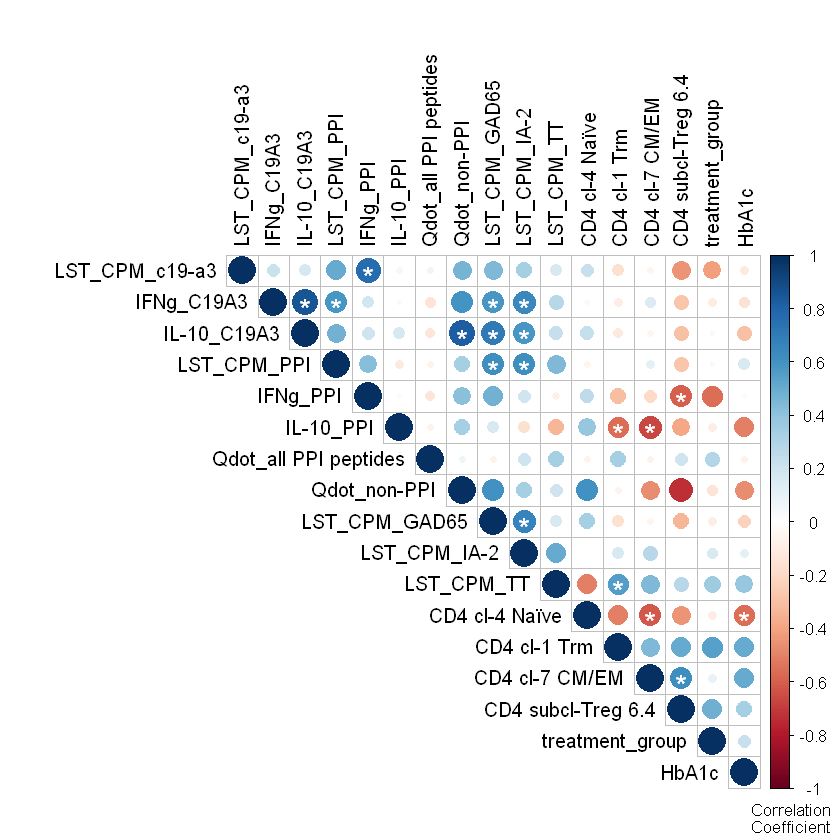

In [18]:
#baseline
dsense<-import("dsense_0.sas7bdat")
dsense<-subset(dsense, select=-c(Paper_code))
names(dsense)[names(dsense) == "timepoint_HbA1c"] <- "HbA1c"

# see ?cor for cor options.  using pairwise.complete.obs because there are cases where all data for a variable is missing for a patient, but we dont want that entire patient point to be deleted
#also decided to use kendalls given the small smaple size, rank nature of method.
m<-cor(dsense, use="pairwise.complete.obs", method="kendall")

#see cor.test function for added parameters that can be used for cor.mtest
#had to use exact=FALSE since their were ties and exact computations could not be performed
#also as a result had to use continuity=TRUE since ties were present
m_sig<-cor.mtest(dsense, method="kendall", conf.level=0.95, , continuity=TRUE, exact=FALSE)

#for sig.level can introduce many different numbers.  used 0 to hide the near perfect correlations (i.e. they wont receive a star)
#order="AOE" (finding angular order of the eigenvectors) seems to be a good way to group vars related to one other more closely together, but does not facilitate comparison between plots
corrplot(m, method="circle",
         order="original",
         type="upper",
         tl.col="black",
         p.mat=m_sig$p, insig = "label_sig",sig.level = c(0, .05), pch.cex = 1.5, pch.col = "white")

mtext("Correlation", side = 1, at=18.5, line=3.3, cex=.85) 
mtext("Coefficient", side = 1, at=18.5, line=4.0, cex=.85) 

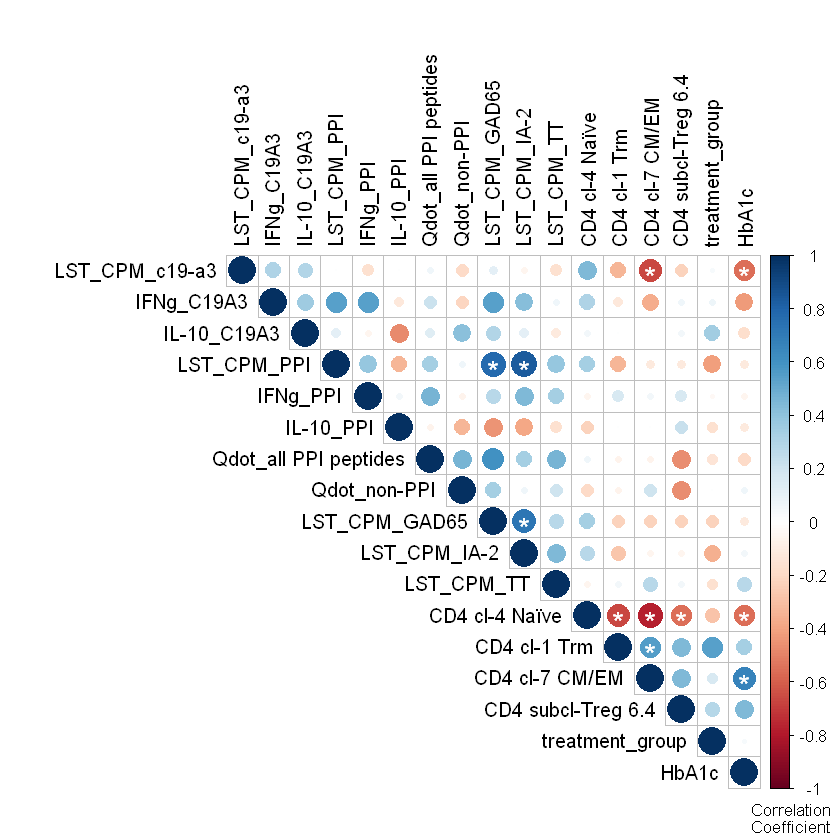

In [19]:
#3 months
dsense<-import("dsense_3.sas7bdat")
dsense<-subset(dsense, select=-c(Paper_code))
names(dsense)[names(dsense) == "timepoint_HbA1c"] <- "HbA1c"


# see ?cor for cor options.  using pairwise.complete.obs because there are cases where all data for a variable is missing for a patient, but we dont want that entire patient point to be deleted
#also decided to use kendalls given the small smaple size, rank nature of method.
m<-cor(dsense, use="pairwise.complete.obs", method="kendall")

#see cor.test function for added parameters that can be used for cor.mtest
#had to use exact=FALSE since their were ties and exact computations could not be performed
#also as a result had to use continuity=TRUE since ties were present
m_sig<-cor.mtest(dsense, method="kendall", conf.level=0.95, , continuity=TRUE, exact=FALSE)

#for sig.level can introduce many different numbers.  used 0 to hide the near perfect correlations (i.e. they wont receive a star)
#order="AOE" (finding angular order of the eigenvectors) seems to be a good way to group vars related to one other more closely together, but does not facilitate comparison between plots
corrplot(m, method="circle",
         order="original",
         type="upper",
         tl.col="black",
         na.label = " ", # had to put this is because of the ? that results
         p.mat=m_sig$p, insig = "label_sig",sig.level = c(0, .05), pch.cex = 1.5, pch.col = "white")


mtext("Correlation", side = 1, at=18.5, line=3.3, cex=.85) 
mtext("Coefficient", side = 1, at=18.5, line=4.0, cex=.85) 

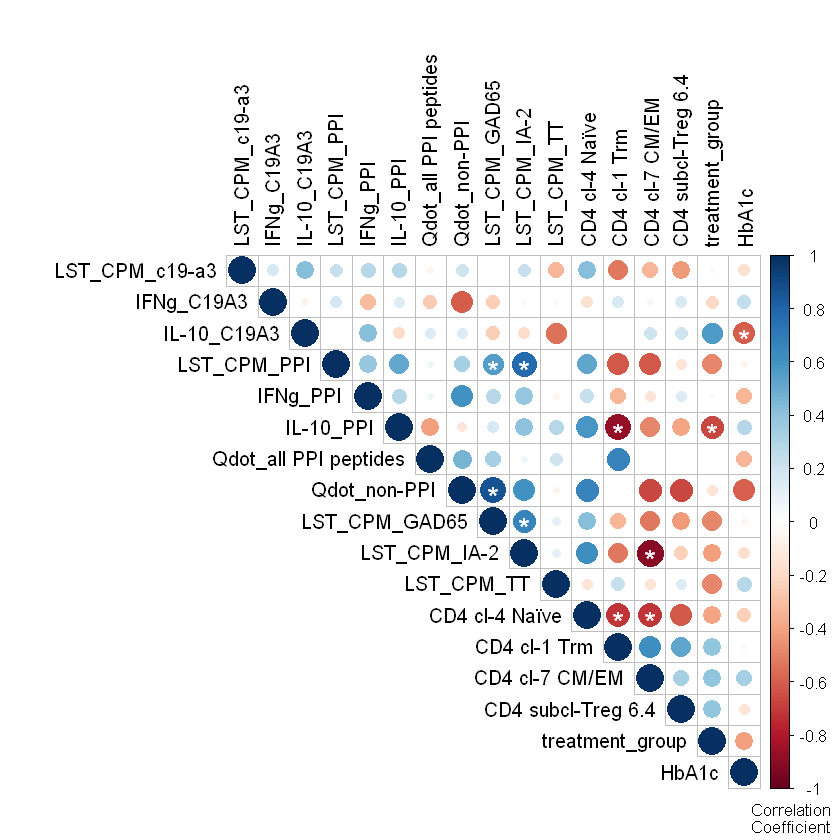

In [20]:
#6 months
dsense<-import("dsense_6.sas7bdat")
dsense<-subset(dsense, select=-c(Paper_code))
names(dsense)[names(dsense) == "timepoint_HbA1c"] <- "HbA1c"

# see ?cor for cor options.  using pairwise.complete.obs because there are cases where all data for a variable is missing for a patient, but we dont want that entire patient point to be deleted
#also decided to use kendalls given the small smaple size, rank nature of method.
m<-cor(dsense, use="pairwise.complete.obs", method="kendall")

#see cor.test function for added parameters that can be used for cor.mtest
#had to use exact=FALSE since their were ties and exact computations could not be performed
#also as a result had to use continuity=TRUE since ties were present
m_sig<-cor.mtest(dsense, method="kendall", conf.level=0.95, , continuity=TRUE, exact=FALSE)

#for sig.level can introduce many different numbers.  used 0 to hide the near perfect correlations (i.e. they wont receive a star)
#order="AOE" (finding angular order of the eigenvectors) seems to be a good way to group vars related to one other more closely together, but does not facilitate comparison between plots
corrplot(m, method="circle",
         order="original",
         type="upper",
         tl.col="black",
         na.label = " ", # had to put this is because of the ? that results
         p.mat=m_sig$p, insig = "label_sig",sig.level = c(0, .05), pch.cex = 1.5, pch.col = "white")

mtext("Correlation", side = 1, at=18.5, line=3.3, cex=.85) 
mtext("Coefficient", side = 1, at=18.5, line=4.0, cex=.85) 

Warning message in cor(dsense, use = "pairwise.complete.obs", method = "kendall"):
"the standard deviation is zero"Warning message in cor(dsense, use = "pairwise.complete.obs", method = "kendall"):
"the standard deviation is zero"Warning message in cor(dsense, use = "pairwise.complete.obs", method = "kendall"):
"the standard deviation is zero"Warning message in cor(dsense, use = "pairwise.complete.obs", method = "kendall"):
"the standard deviation is zero"Warning message in cor(dsense, use = "pairwise.complete.obs", method = "kendall"):
"the standard deviation is zero"Warning message in cor(dsense, use = "pairwise.complete.obs", method = "kendall"):
"the standard deviation is zero"Warning message in cor(dsense, use = "pairwise.complete.obs", method = "kendall"):
"the standard deviation is zero"Warning message in cor(dsense, use = "pairwise.complete.obs", method = "kendall"):
"the standard deviation is zero"Warning message in cor(dsense, use = "pairwise.complete.obs", method = "kendall"

"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard de

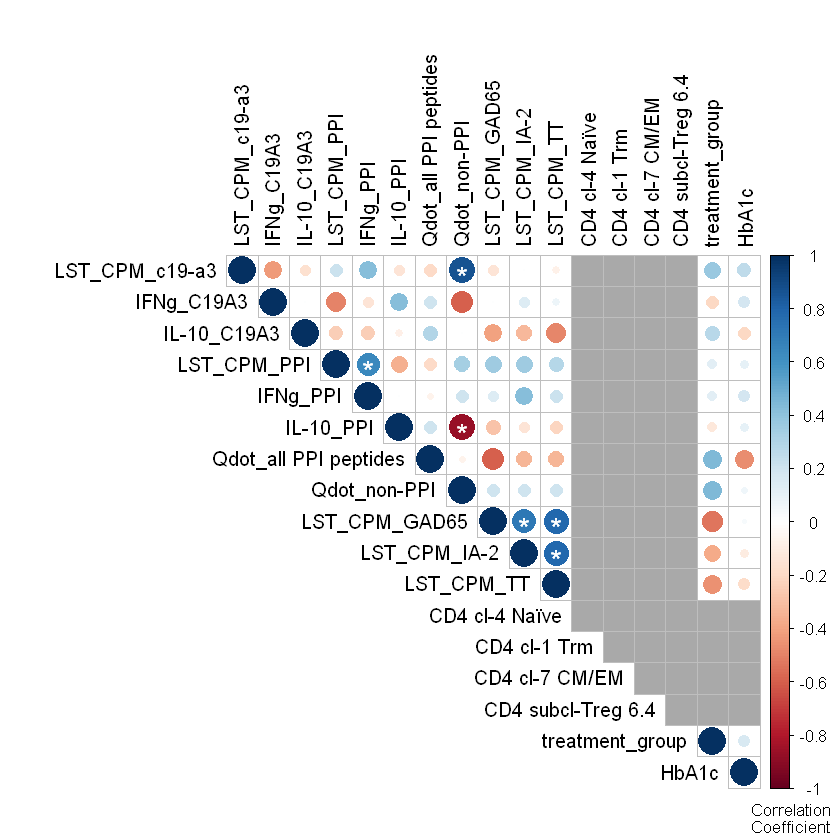

In [21]:
#final visit (revisit)
dsense<-import("dsense_9.sas7bdat")
#dsense<-subset(dsense, select=-c(Paper_code, `CD4 cl-4 Naïve`, `CD4 cl-1 Trm`, `CD4 cl-7 CM/EM`, `CD4 subcl-Treg 6.4`))


dsense<-subset(dsense, select=-c(Paper_code))
#assigning missing values 0 so that they appear in the bubble plot
dsense$`CD4 cl-4 Naïve`[is.na(dsense$`CD4 cl-4 Naïve`)] <- 0
dsense$`CD4 cl-1 Trm`[is.na(dsense$`CD4 cl-1 Trm`)] <- 0
dsense$`CD4 cl-7 CM/EM`[is.na(dsense$`CD4 cl-7 CM/EM`)] <- 0
dsense$`CD4 subcl-Treg 6.4`[is.na(dsense$`CD4 subcl-Treg 6.4`)] <- 0
names(dsense)[names(dsense) == "timepoint_HbA1c"] <- "HbA1c"

# see ?cor for cor options.  using pairwise.complete.obs because there are cases where all data for a variable is missing for a patient, but we dont want that entire patient point to be deleted
#also decided to use kendalls given the small smaple size, rank nature of method.
m<-cor(dsense, use="pairwise.complete.obs", method="kendall")

#see cor.test function for added parameters that can be used for cor.mtest
#had to use exact=FALSE since their were ties and exact computations could not be performed
#also as a result had to use continuity=TRUE since ties were present
m_sig<-cor.mtest(dsense, method="kendall", conf.level=0.95, , continuity=TRUE, exact=FALSE)

#for sig.level can introduce many different numbers.  used 0 to hide the near perfect correlations (i.e. they wont receive a star)
#order="AOE" (finding angular order of the eigenvectors) seems to be a good way to group vars related to one other more closely together, but does not facilitate comparison between plots
corrplot(m, method="circle",
         order="original",
         type="upper",
         tl.col="black",
         na.label="square", na.label.col = "darkgrey",
         cl.pos="r", #indicates position of label,
         #cl.cex=1, #legend font size
         #tl.cex=1, #axis font size
         p.mat=m_sig$p, insig = "label_sig",sig.level = c(0, .05), pch.cex = 1.5, pch.col = "white")


mtext("Correlation", side = 1, at=18.5, line=3.3, cex=.85) 
mtext("Coefficient", side = 1, at=18.5, line=4.0, cex=.85) 